In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize     # algorithm minimize theta
import scipy.io                         # read data from .mat

In [2]:
# Setup the parameters you will use for this exercise
input_layer_size = 400      # 20 x 20 input images of digits
hidden_layer_size = 25      # 25 hidden units
num_labels = 10

In [3]:
raw_data = scipy.io.loadmat("ex4data1.mat")
X = raw_data.get("X")
y = raw_data.get("y")
y = (y-1) % 10
m = len(X)

In [4]:
def displayData(X):
    num_plots = int(np.sqrt(len(X)))     # 10 number / row
    fig, ax = plt.subplots(num_plots, num_plots, sharex=True, sharey=True)
    img_ind = 0

    for i in range(num_plots):
        for j in range(num_plots):
            img = X[img_ind, :].reshape(20, 20).T
            ax[i][j].imshow(img, cmap='gray')
            img_ind += 1
    
    return (fig, ax)

In [15]:
def sigmoid(z):
    return 1.0 / (1.0 + np.e**(-z))

def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

def randomInitialization(L_in, L_out):
    # Randomly initalize the weights of a layer with L_in incoming
    # connections and L_out outgoing connections. Avoids symmetry
    # problems when training the neural network.
    
    randomWeight = np.random.uniform(low=.12, high=.12, size=(L_in, L_out))

    return randomWeight

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_param):
    # X: 5000 x 400
    # y: 10 x 1
    # Theta1: 25 x 401
    # Theta2: 10 x 26
    
    Theta1 = nn_params[: (hidden_layer_size * (input_layer_size + 1))].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1) : ].reshape(num_labels, hidden_layer_size + 1)

    m = len(y)

    # Turn scalar y values to matrix
    y_vec = np.zeros((m, num_labels)) # 5000 x 10

    for i in range(m):
        y_vec[i][y[i]] = 1

    # Return all of this variables
    J = 0
    Theta1_grad = np.zeros_like(Theta1)
    Theta2_grad = np.zeros_like(Theta2)

    # Part 1: Feedforward the nn and return J
    A1 = np.hstack((np.ones((m, 1)), X))    # 5000 x 401
    
    Z2 = A1 @ Theta1.T                      # 5000 x 25
    A2 = sigmoid(Z2)                        # 5000 x 25
    A2 = np.hstack((np.ones((len(A2), 1)), A2)) # 5000 x 26

    Z3 = A2 @ Theta2.T                      # 5000 x 10
    A3 = sigmoid(Z3)                        # 5000 x 10

    J = (1/m) * np.sum( np.sum(-y_vec*np.log(A3) - (1 - y_vec)*np.log(1-A3)) )

    # Part 2: Regularized cost function
    reg = (reg_param/(2*m)) * (np.sum(np.sum(Theta1[:, 1:]*Theta1[:, 1:])) + np.sum(np.sum(Theta2[:, 1:]*Theta2[:, 1:])))
    J = J + reg

    # Part 3: Backpropagation (With for loop)
    cost = [0] * m
    Theta1_grad_1 = np.zeros_like(Theta1)
    Theta2_grad_2 = np.zeros_like(Theta2)
    X1 = np.hstack((np.ones((m, 1)), X))
    
    init_y_1 = np.zeros((m, num_labels)) # 5000 x 10
    for i in range(m):
        init_y_1[i][y[i]] = 1

    for i in range(m):
        # Feedforward
        a1 = X1[i, :]                               # 401 x 1
        z2 = Theta1 @ a1                            # 25 x 1
        a2 = sigmoid(z2)                            # 25 x 1
        a2 = np.hstack((np.ones((len(a2), 1)), a2)) # 26 x 1
        a3 = Theta2 @ a2                            # 10 x 1

        # Backpropagation
        Delta3 = a3 - init_y_1[i, :].T              # 10 x 1
        Delta2 = (Theta2.T @ Delta3) * (np.hstack((np.ones((len(z2), 1)), sigmoidGradient(z2)))) # 26 x 1
        Delta2 = Delta2[1:, :]                      # 25 x 1

        Theta1_grad_1 = Theta1_grad_1 + (Delta2 @ a1.T)     # 26 x 401
        Theta2_grad_2 = Theta2_grad_2 + (Delta3 @ a2.T)     # 10 x 26
        
    Theta1_grad_1 = (1/m) * Theta1_grad_1
    Theta2_grad_2 = (1/m) * Theta2_grad_2
    # Part 4: Backpropagation (Vectorization)

    grad = np.append(Theta1_grad, Theta2_grad).reshape(-1)
    return (J, grad)

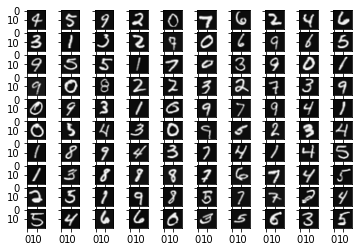

In [6]:
# Randomly select 100 datapoint to display
rand_indices = np.random.randint(0, m, 100)
sel = X[rand_indices, :]
digit_grid, ax = displayData(sel)
digit_grid.show()

In [7]:
# Loading parameter form ex4weights.mat
raw_params = scipy.io.loadmat("ex4weights.mat")
theta1 = raw_params.get("Theta1")       # 25 x 401
theta2 = raw_params.get("Theta2")       # 10 x 26

# Unroll parameter
nn_params = np.append(theta1, theta2).reshape(-1)

In [18]:
# Compute cost
reg_param = 1

cost, g = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_param)
cost

0.38376985909092365

In [38]:
init_y_1 = np.zeros((m, num_labels)) # 5000 x 10
for i in range(m):
    init_y_1[i][y[i]] = 1
(init_y_1[1, :].T).shape

(10,)